In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D
import itertools

import fgRPA_ucst as fgu

from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

In [9]:
sigmas = {}
with open('/home/adria/scripts/data/hps/sigmas.dat', 'r') as sig_f:
    lines = sig_f.readlines()
    for line in lines:
        aa = line.split(" ")[0]
        sigma = line.split(" ")[1].replace('\n','')
        print(f"{aa} & {sigma} \\\\")
        
    

ALA & 5.04 \\
ARG & 6.56 \\
ASN & 5.68 \\
ASP & 5.58 \\
CYS & 5.48 \\
GLN & 6.02 \\
GLU & 5.92 \\
GLY & 4.50 \\
HIS & 6.08 \\
ILE & 6.18 \\
LEU & 6.18 \\
LYS & 6.36 \\
MET & 6.18 \\
PHE & 6.36 \\
PRO & 5.56 \\
SER & 5.18 \\
THR & 5.62 \\
TRP & 6.78 \\
TYR & 6.46 \\
VAL & 5.86 \\


In [21]:
# eps fun
find_cri=True
phis_mM = 100
ehs = [0,0]
seqname='CPEB4_7D'


u_wt, wt_sp1, wt_sp2, wt_bi1, wt_bi2 = fgu.fgRPA_ucst(seqname=seqname, find_cri=find_cri, phis_mM=phis_mM,
                                            ehs=ehs, parallel=False, epsfun=True, cri_only=True,
                                                      name="d4_eps_fun_re").run()

Seq: CPEB4_7D = MGDYGFGVLVQSNTGNKDAFPVRFHPHLQPPHHHQNADPDPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLDPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRDPADPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSDAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE 
phi_s= 0.0018 r_res = 1 , r_con = 1 , r_sal = 1 , eta = 1 
ehs : 0 0
Saving criticial point only at /home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/c_only_d4_eps_fun_re.txt


TypeError: cannot unpack non-iterable NoneType object

In [19]:
seq = "MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKARTYGRRRGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE"
seq2 = "MGDYGFGVLVQSNTGNKSAFPVRFHPHLQPPHHHQNATPSPAAFINNNTAANGSSAGSAWLFPAPATHNIQDEILGSEKAKSQQQEQQDPLEKQQLSPSPGQEAGILPETEKAKSEENQGDNSSENGNGKEKIRIESPVLTGFDYQEATGLGTSTQPLTSSASSLTGFSNWSAAIAPSSSTIINEDASFFHQGGVPAASANNGALLFQNFPHHVSPGFGGSFSPQIGPLSQHHPHHPHFQHHHSQHQQQRRSPASPHPPPFTHRNAAFNQLPHLANNLNKPPSPWSSYQSPSPTPSSSWSPGGGGYGGWGGSQGRDHRRGLNGGITPLNSISPLKKNFASNHIQLQKYARPSSAFAPKSWMEDSLNRADNIFPFPDRPRTFDMHSLESSLIDIMRAENDTIKGQSSLFPMEDGFLDDGRGDQPLHSGLGSPHCFSHQNGE"
q=0
t = []
for aa in seq2:
    if aa == 'R' or aa == 'K':
        q += +1
    elif aa == 'D' or aa == 'E':
        q += -1
    elif aa == 'H':
        q += 0
        t.append(1)
        continue
    t.append(0)
q     

-8

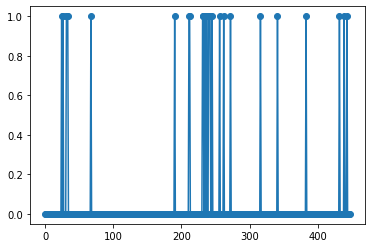

In [18]:
import matplotlib.pyplot as plt
plt.plot(t, marker='o')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


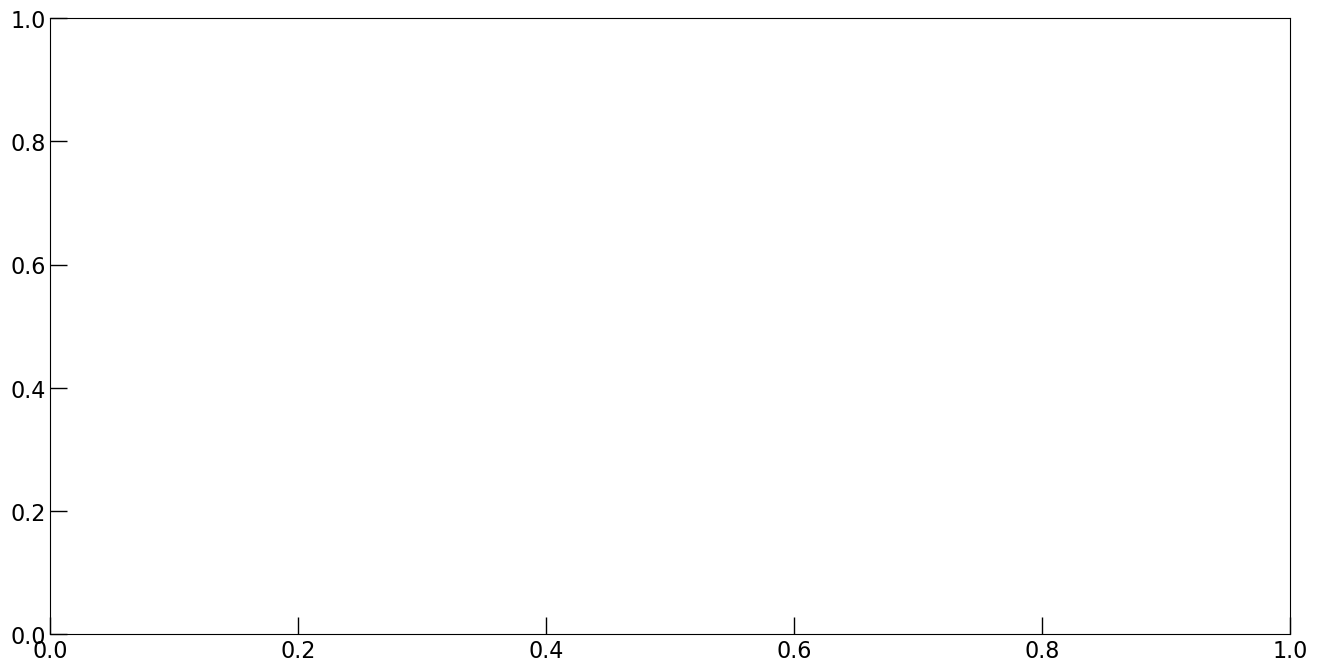

In [23]:
fig, axs = plt.subplots(figsize=(16,8))
s = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT')
fig.subplots_adjust(wspace=0, hspace=0)
win, plus, minus = s.get_charge_seq()